# The Impact of Context on Integrity

The main goal here is to assess whether or not the difficulty of an exam and whether or not the context is competitive will influence the extent to which people will (a) feel frustrated and (b) take action. We will be running 2 (difficulty) X 2 (competitiveness) ANOVAs for each item within the questionnaire. There were four items for action, and only one for frustration.

### General Outline
As per our general analysis philosophy, descriptive statistics will come before inferential analyses.

* General discussion about how many subjects we have
* Descriptive statistics for frustration and action items
* ANOVAs for frustration and action items

In [2]:
options(scipen = 999)
library(tidyverse)
library(data.table)
library(ez)
library(xlsx)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

Loading required package: rJava
Loading required package: xlsxjars


In [3]:
current_data <- fread('../data/integrity_tidy.csv', stringsAsFactors = TRUE)
current_data <- current_data %>% 
mutate(curve = recode(curve, 'com' = 'curve', 'non' = 'no_curve'))
head(current_data)
str(current_data)

subject,difficulty,curve,question_number,action,frustrate
4,diff,curve,1,6,6
4,diff,curve,2,6,NA
4,diff,curve,3,6,NA
4,diff,curve,4,4,NA
4,diff,no_curve,1,5,4
4,diff,no_curve,2,3,NA


'data.frame':	896 obs. of  6 variables:
 $ subject        : int  4 4 4 4 4 4 4 4 4 4 ...
 $ difficulty     : Factor w/ 2 levels "diff","easy": 1 1 1 1 1 1 1 1 2 2 ...
 $ curve          : Factor w/ 2 levels "curve","no_curve": 1 1 1 1 2 2 2 2 1 1 ...
 $ question_number: Factor w/ 4 levels "1","2","3","4": 1 2 3 4 1 2 3 4 1 2 ...
 $ action         : int  6 6 6 4 5 3 5 2 4 4 ...
 $ frustrate      : int  6 NA NA NA 4 NA NA NA 5 NA ...


** Discussion of Subjects**

In [4]:
N <- current_data %>% 
group_by(subject) %>% 
summarize(n()) %>% 
nrow
N

[1] 56

We have data for 56 total subjects. Yu indicated to me that the first three subjects were pilot subjects, and so they have been dropped from the analysis. Let's make sure we have data in all cells for all subjects.

In [5]:
current_data %>% 
gather(question_type, rating, c(action, frustrate)) %>% 
filter(complete.cases(rating)) %>% 
group_by(subject, difficulty, curve) %>% 
summarize(obs = n()) %>% 
filter(obs != 5)

subject,difficulty,curve,obs


All 56 subjects have data in all cells of the design.

## Descriptive Statistics

### Frustration items
We'll look at the mean response for frustration broken down by difficulty and curve

difficulty,curve,Frustrate (Mean),Frustrate (SE)
diff,curve,5.732143,0.1898240
diff,no_curve,4.785714,0.2187840
easy,curve,4.821429,0.1821715
easy,no_curve,3.660714,0.2181337


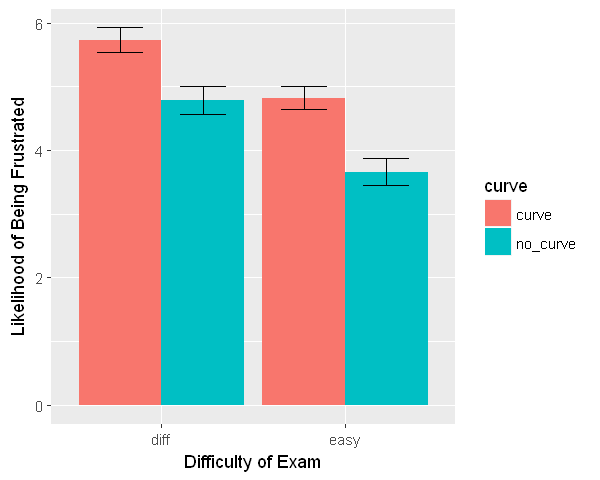

In [6]:
options(repr.plot.width = 5, repr.plot.height = 4)
cell_means <- current_data %>% 
group_by(subject, difficulty, curve) %>% 
summarize(frustrate = mean(frustrate, na.rm = TRUE)) %>% 
group_by(difficulty, curve) %>% 
summarize('Frustrate (Mean)' = mean(frustrate, na.rm = TRUE), 'Frustrate (SE)' = sd(frustrate, na.rm = TRUE) / sqrt(N))

cell_means

cell_means %>% 
rename(frustrate = 'Frustrate (Mean)', se = 'Frustrate (SE)') %>% 
ggplot(aes(x = difficulty, y = frustrate, group = curve)) + 
geom_bar(stat = 'identity', aes(fill = curve), position = 'dodge') + 
geom_errorbar(aes(ymin = frustrate - se, ymax = frustrate + se), position = position_dodge(width = .9), width = .5) + 
xlab('Difficulty of Exam') + ylab('Likelihood of Being Frustrated')

Based off the descriptives, it looks like two main effects and no interaction.

### Action Items

**Just for reference:**  
Question 1:  
How likely would you do something in the scenario above?

Question 2:  
How likely would you report to the professor that this student cheated after class?

Question 3:  
How likely would you anonymously report that this student cheated after class?

Question 4:  
How likely would you confront the cheating student at the end of the exam to suggest they confess?

difficulty,curve,Question 1_mean,Question 1_se,Question 2_mean,Question 2_se,Question 3_mean,Question 3_se,Question 4_mean,Question 4_se
diff,curve,2.875000,0.2086794,2.625000,0.2185586,3.714286,0.2752971,2.107143,0.1866982
diff,no_curve,2.125000,0.1748144,1.928571,0.1547036,2.910714,0.2487329,1.821429,0.1552274
easy,curve,2.232143,0.1728130,2.000000,0.1631667,3.053571,0.2382562,1.892857,0.1645114
easy,no_curve,1.696429,0.1505825,1.642857,0.1334570,2.339286,0.1961923,1.500000,0.1167748


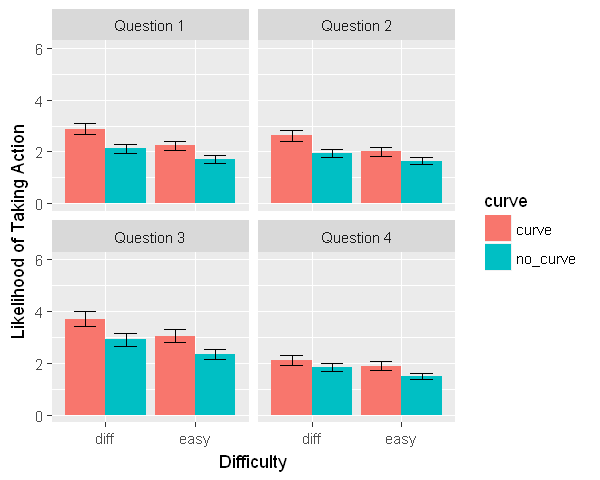

In [7]:
cell_means <- current_data %>% 
group_by(difficulty, curve, question_number) %>% 
summarize(action_mean = mean(action, na.rm = TRUE), action_se = sd(action, na.rm = TRUE) / sqrt(N)) 

cell_means %>% 
rename(mean = action_mean, se = action_se) %>% 
gather(stat, value, mean:se) %>% 
mutate(question_number = recode(question_number, `1` = 'Question 1', `2` = 'Question 2', 
                               `3` = 'Question 3', `4` = 'Question 4')) %>% 
unite(variable, question_number, stat) %>% 
spread(variable, value) 



cell_means %>% 
mutate(question_number = recode(question_number, `1` = 'Question 1', `2` = 'Question 2', 
                               `3` = 'Question 3', `4` = 'Question 4')) %>% 
ggplot(aes(x = difficulty, y = action_mean, group = curve)) + 
geom_bar(stat = 'identity', aes(fill = curve), position = 'dodge') + 
geom_errorbar(stat = 'identity', aes(ymin = action_mean - action_se, ymax = action_mean + action_se), 
            position = position_dodge(width = .9), width = .5) + facet_wrap(~question_number) + ylim(0,6) + 
xlab('Difficulty') + ylab('Likelihood of Taking Action')

## The ANOVAs

### "Frustrate" ANOVA

In [8]:
head(current_data)

subject,difficulty,curve,question_number,action,frustrate
4,diff,curve,1,6,6
4,diff,curve,2,6,NA
4,diff,curve,3,6,NA
4,diff,curve,4,4,NA
4,diff,no_curve,1,5,4
4,diff,no_curve,2,3,NA


In [9]:
frustrate_model <- ezANOVA(data = current_data[complete.cases(current_data$frustrate),], 
                                                              wid = subject, within = .(difficulty, curve), 
                                                              dv = frustrate, detailed = TRUE)
cbind(frustrate_model$ANOVA, n2p = frustrate_model$ANOVA$SSn / (frustrate_model$ANOVA$SSn + frustrate_model$ANOVA$SSd)) %>% 
mutate(p = round(p,4))

Warning message:
"Converting "subject" to factor for ANOVA."

Effect,DFn,DFd,SSn,SSd,F,p,p<.05,ges,n2p
(Intercept),1,55,5054.0000000,370.00000,751.270270,0.0000,*,0.908800164,0.93178466
difficulty,1,55,58.0178571,58.98214,54.100817,0.0000,*,0.102650785,0.49587912
curve,1,55,62.1607143,47.83929,71.465099,0.0000,*,0.109180441,0.56509740
difficulty:curve,1,55,0.6428571,30.35714,1.164706,0.2852,,0.001265912,0.02073733


Just two main effects and no interaction.

### "Action" ANOVAs

Remember, we're running one ANOVA per question, so four total ANOVAs.

In [10]:
head(current_data)

subject,difficulty,curve,question_number,action,frustrate
4,diff,curve,1,6,6
4,diff,curve,2,6,NA
4,diff,curve,3,6,NA
4,diff,curve,4,4,NA
4,diff,no_curve,1,5,4
4,diff,no_curve,2,3,NA


In [17]:
current_data %>% 
group_by('Question Number' = question_number) %>% 
do(ezANOVA(data = ., wid = subject, within = .(difficulty, curve), dv = action, detailed = TRUE)$ANOVA) %>% 
mutate(n2p = SSn / (SSn + SSd),
      p = round(p, 4))

Warning message:
"Converting "subject" to factor for ANOVA."Warning message:
"Converting "subject" to factor for ANOVA."Warning message:
"Converting "subject" to factor for ANOVA."Warning message:
"Converting "subject" to factor for ANOVA."

Question Number,Effect,DFn,DFd,SSn,SSd,F,p,p<.05,ges,n2p
1,(Intercept),1,55,1116.0714286,287.42857,213.5623757,0.0000,*,0.7410129944,0.795205863
1,difficulty,1,55,16.0714286,32.42857,27.2577093,0.0000,*,0.0395708758,0.331369661
1,curve,1,55,23.1428571,37.35714,34.0726577,0.0000,*,0.0560069144,0.382526564
1,difficulty:curve,1,55,0.6428571,32.85714,1.0760870,0.3041,,0.0016453382,0.019189765
2,(Intercept),1,55,940.5401786,279.20982,185.2718130,0.0000,*,0.7244751638,0.771092583
2,difficulty,1,55,11.6116071,24.13839,26.4573701,0.0000,*,0.0314415231,0.324800200
2,curve,1,55,15.5401786,37.20982,22.9700060,0.0000,*,0.0416362658,0.294600542
2,difficulty:curve,1,55,1.6116071,17.13839,5.1719198,0.0269,*,0.0044853078,0.085952381
3,(Intercept),1,55,2022.0044643,621.24554,179.0117420,0.0000,*,0.7381249990,0.764969059
3,difficulty,1,55,21.2544643,35.99554,32.4761255,0.0000,*,0.0287755435,0.371257018


Just to orient you a little to what's going on here:
* Don't worry about `(Intercept)`
* Note all main effects significant across all question numbers
* Note that the interaction is only significant for Question 2  

I'll give you the descriptives for the 2x2 interaction in question 2 below.

difficulty,curve,Action (Mean),Action (SE)
diff,curve,2.625000,0.2185586
diff,no_curve,1.928571,0.1547036
easy,curve,2.000000,0.1631667
easy,no_curve,1.642857,0.1334570


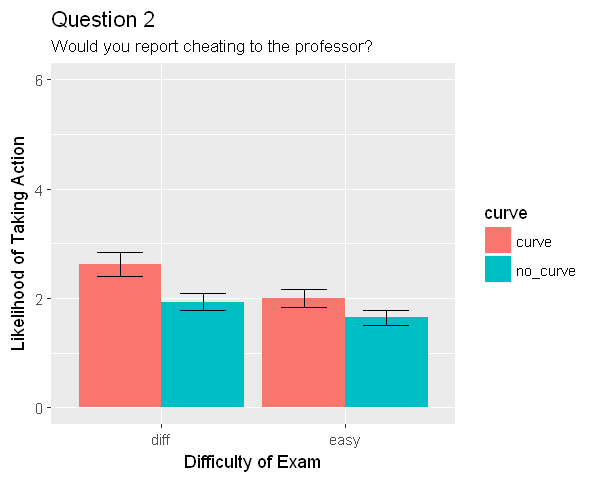

In [12]:
means <- current_data %>% 
filter(question_number == 2) %>% 
group_by(subject, difficulty, curve) %>% 
summarize(action = mean(action)) %>% 
group_by(difficulty, curve) %>% 
summarize('Action (Mean)' = mean(action), 'Action (SE)' = sd(action) / sqrt(N)) 

means

means %>% 
rename(action = 'Action (Mean)', se = 'Action (SE)') %>% 
ggplot(aes(x = difficulty, y = action, group = curve)) + 
geom_bar(aes(fill = curve), stat = 'identity', position = 'dodge') + 
geom_errorbar(aes(ymin = action - se, ymax = action + se), position = position_dodge(width = .9), width = .5) + 
labs(x = 'Difficulty of Exam', y = 'Likelihood of Taking Action', title = 'Question 2', 
     subtitle = 'Would you report cheating to the professor?') + ylim(0,6)

## Data Access
I'm going to save data to the "data" folder in your guys' file in the OSF so that you can access it if you want; more specifically: `./Integrity Group/data`

`subject_action.xlsx` -- The means for the full design (including question type) for action broken down by subject  
`subject_frustrate.xlsx` -- The means for the full design for frustration broken down by subject

In [13]:
library(reshape2)
current_data %>% 
group_by(subject, difficulty, curve, question_number) %>% 
summarize(action = mean(action)) %>% 
dcast(subject ~ difficulty + curve + question_number) %>% 
mutate(subject = as.numeric(subject)) %>% 
arrange(subject) %>% 
write.xlsx('../data/subject_action.xlsx', row.names = FALSE)

current_data %>% 
group_by(subject, difficulty, curve)  %>% 
summarize(frustrate = mean(frustrate, na.rm = TRUE)) %>% 
dcast(subject ~ difficulty + curve) %>% 
mutate(subject = as.numeric(subject)) %>% 
arrange(subject) %>% 
write.xlsx('../data/subject_frustrate.xlsx', row.names = FALSE)



Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt

The following object is masked from 'package:tidyr':

    smiths

Using action as value column: use value.var to override.
Using frustrate as value column: use value.var to override.
